In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2, os, seaborn

In [18]:
resnet = tf.keras.applications.ResNet50()

In [19]:
resnet.input_shape

(None, 224, 224, 3)

In [20]:
resnet.output_shape

(None, 1000)

In [21]:
! wget https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg

--2025-11-03 17:50:23--  https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216605 (212K) [image/jpeg]
Saving to: ‘dog-puppy-on-garden-royalty-free-image-1586966191.jpg.1’

dog-puppy-on-garden 100%[===================>] 211.53K  --.-KB/s    in 0.01s   

2025-11-03 17:50:23 (14.0 MB/s) - ‘dog-puppy-on-garden-royalty-free-image-1586966191.jpg.1’ saved [216605/216605]



In [22]:
image = cv2.imread("dog-puppy-on-garden-royalty-free-image-1586966191.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
image = np.expand_dims(image, axis=0)
image.shape

(1, 224, 224, 3)

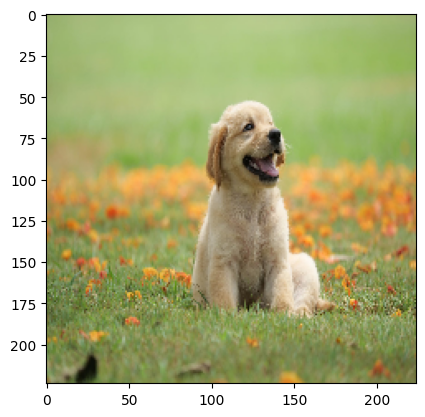

In [23]:
plt.imshow(image[0])

In [24]:
# Preprocessing
image = tf.keras.applications.resnet50.preprocess_input(image)

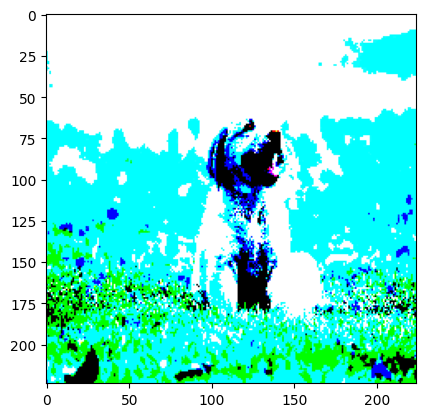

In [25]:
plt.imshow(image[0])

In [26]:
result = resnet.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [27]:
tf.keras.applications.resnet50.decode_predictions(result)

[[('n02113799', 'standard_poodle', np.float32(0.6584143)),
  ('n02099601', 'golden_retriever', np.float32(0.23853557)),
  ('n02099712', 'Labrador_retriever', np.float32(0.070707336)),
  ('n02113712', 'miniature_poodle', np.float32(0.013101413)),
  ('n02102318', 'cocker_spaniel', np.float32(0.0050789686))]]

In [28]:
# applications = https://keras.io/api/applications/

In [29]:
resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

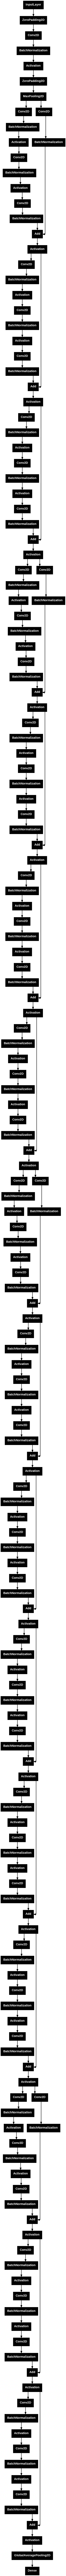

In [30]:
tf.keras.utils.plot_model(resnet)

In [31]:
resnet.to_json()

'{"module": "keras.src.models.functional", "class_name": "Functional", "config": {"name": "resnet50", "trainable": true, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 224, 224, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_layer_1"}, "registered_name": null, "name": "input_layer_1", "inbound_nodes": []}, {"module": "keras.layers", "class_name": "ZeroPadding2D", "config": {"name": "conv1_pad", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "padding": [[3, 3], [3, 3]], "data_format": "channels_last"}, "registered_name": null, "build_config": {"input_shape": [null, 224, 224, 3]}, "name": "conv1_pad", "inbound_nodes": [{"args": [{"class_name": "__keras_tensor__", "config": {"shape": [null, 224, 224, 3], "dtype": "float32", "keras_history": ["input_layer_1", 0, 0]}}], "kwargs": {}}]}, {"module": "keras.layers", "class_name": "

In [32]:
#Download data -
! mkdir -p /root/.kaggle
! mv kaggle.json /root/.kaggle
import kaggle
! kaggle competitions download -c dog-breed-identification
! unzip -q dog-breed-identification.zip

 93% 642M/691M [00:03<00:00, 147MB/s]
100% 691M/691M [00:03<00:00, 211MB/s]


In [33]:
label = pd.read_csv("labels.csv")
label.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [34]:
label["id"] = label["id"] + ".jpg"

In [35]:
# Image Data Generator
batch_size = 64
idg = tf.keras.preprocessing.image.ImageDataGenerator(
                                                      validation_split=0.1,
                                                      rotation_range=30,
                                                      horizontal_flip=True)

train_idg = idg.flow_from_dataframe(label, "train/", "id", "breed",
                                    target_size=(224, 224),
                                    batch_size = batch_size,
                                    subset="training")
val_idg = idg.flow_from_dataframe(label, "train/", "id", "breed",
                                    target_size=(224, 224),
                                    batch_size = batch_size,
                                    subset="validation")

Found 9200 validated image filenames belonging to 120 classes.
Found 1022 validated image filenames belonging to 120 classes.


In [36]:
# Model -

#Input -
input = tf.keras.layers.Input((224, 224, 3), name='inputlayer')

################################################################
#### VGG

# Preprocessing in layers -
vgg_pre_pro = tf.keras.layers.Lambda(tf.keras.applications.vgg16.preprocess_input, name="vggPrepro") (input)

#download the vgg no_top model
vgg_notop = tf.keras.applications.VGG16(include_top=False, input_shape=(224, 224, 3))
vgg_notop.trainable = False

# Model as a layer
vgg = vgg_notop (vgg_pre_pro)

# Global Avg Pooling
vgg_gap = tf.keras.layers.GlobalAveragePooling2D(name="vggGap") (vgg)

################################################################
### Resnet
# Resnet Preprocessing -
resnet_pre_pro = tf.keras.layers.Lambda(tf.keras.applications.resnet50.preprocess_input, name='resnetPrepro') (input)

# download resent model
resnet_notop = tf.keras.applications.ResNet50(include_top=False, input_shape=(224, 224, 3))
resnet_notop.trainable = False

# model as a layer
resnet = resnet_notop (resnet_pre_pro)

# global avg pooling
resnet_gap = tf.keras.layers.GlobalAveragePooling2D(name="resnetGap") (resnet)
################################################################

# Concat
concat = tf.keras.layers.Concatenate(name="concat") ([vgg_gap, resnet_gap])
# dropout = tf.keras.layers.Dropout(0.50) (concat)
dense = tf.keras.layers.Dense(256, activation='relu', name='dense') (concat)
# dropout = tf.keras.layers.Dropout(0.50) (concat)
output = tf.keras.layers.Dense(120, activation='softmax', name='output') (dense)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [37]:
final_model = tf.keras.models.Model(inputs= [input], outputs= [output])

In [38]:
final_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ inputlayer          │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vggPrepro (Lambda)  │ (None, 224, 224,  │          0 │ inputlayer[0][0]  │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnetPrepro        │ (None, 224, 224,  │          0 │ inputlayer[0][0]  │
│ (Lambda)            │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ vggPrepro[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ resnetPrepro[0][… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vggGap              │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnetGap           │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat              │ (None, 2560)      │          0 │ vggGap[0][0],     │
│ (Concatenate)       │                   │            │ resnetGap[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    655,616 │ concat[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 120)       │     30,840 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,988,856 (148.73 MB)

 Trainable params: 686,456 (2.62 MB)

 Non-trainable params: 38,302,400 (146.11 MB)

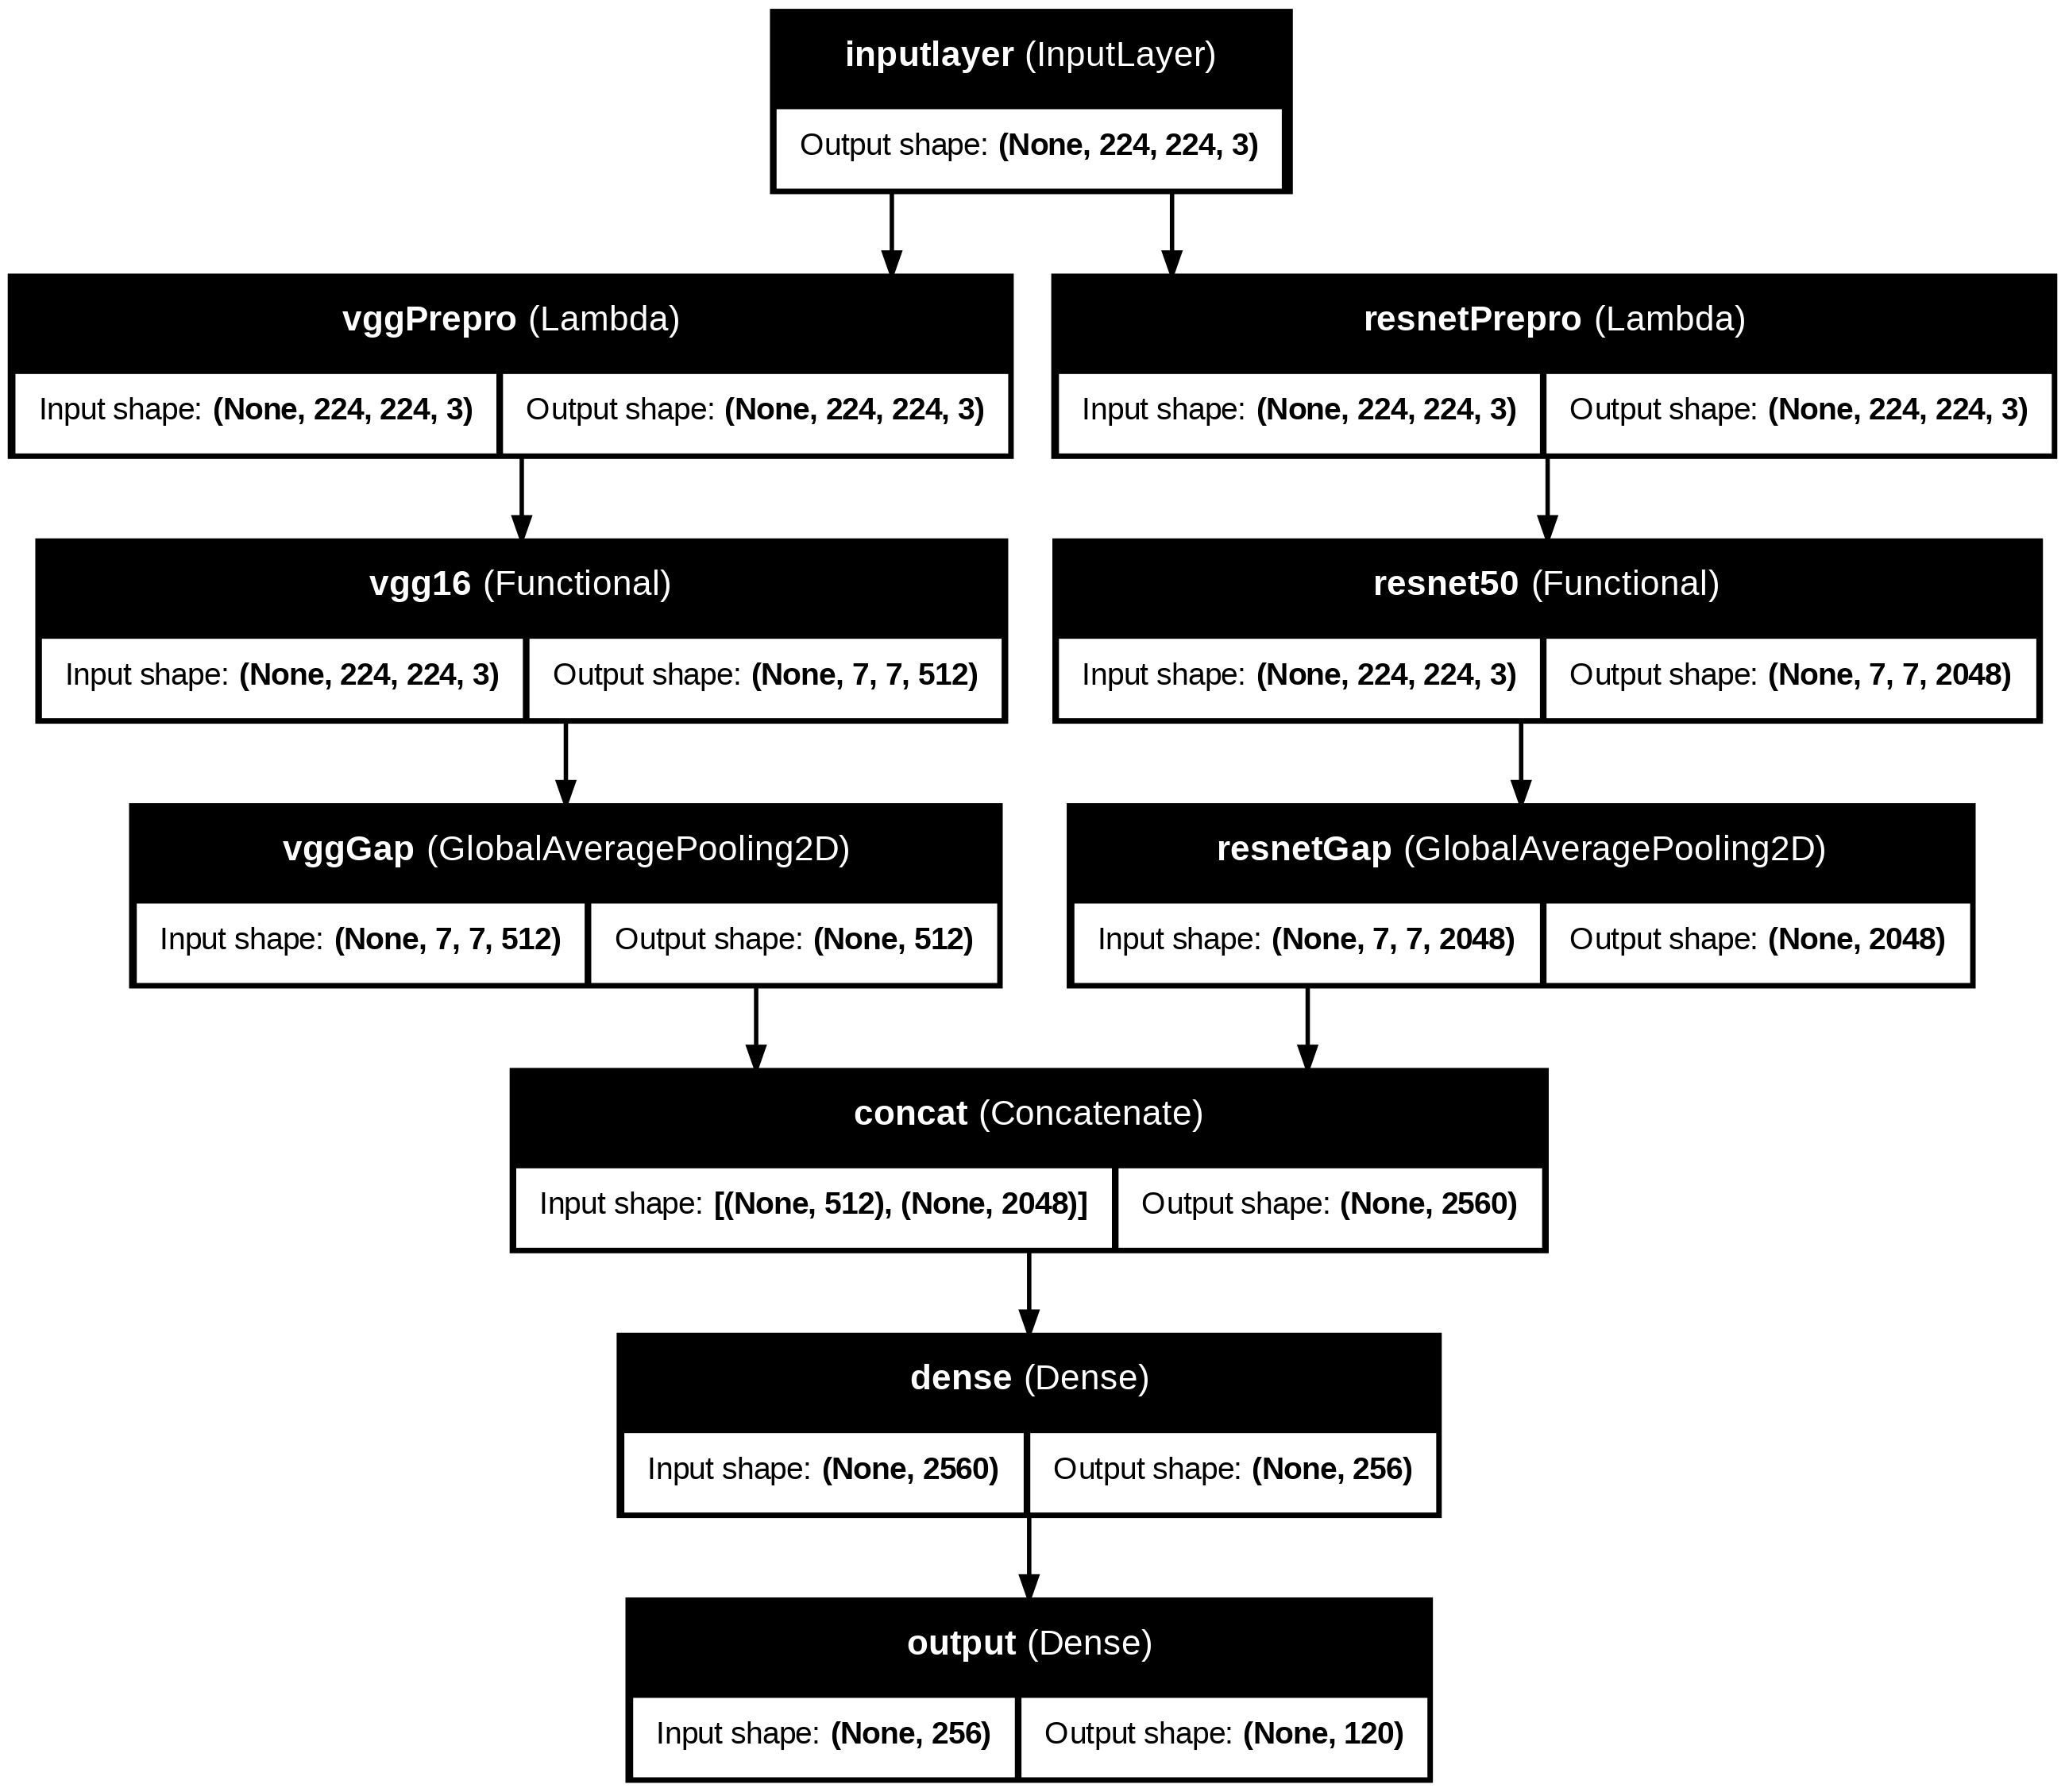

In [39]:
tf.keras.utils.plot_model(final_model, show_layer_names=True, show_shapes=True)

In [40]:
final_model.compile(tf.keras.optimizers.SGD(), tf.keras.losses.categorical_crossentropy,
                    metrics = ["acc"])

In [41]:
final_model.fit(train_idg, batch_size = batch_size, epochs=10, validation_data = val_idg)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - acc: 0.1241 - loss: 4.4802 - val_acc: 0.3836 - val_loss: 2.3840
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - acc: 0.4932 - loss: 1.8843 - val_acc: 0.5303 - val_loss: 1.7466
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - acc: 0.6219 - loss: 1.3662 - val_acc: 0.5734 - val_loss: 1.5554
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - acc: 0.6811 - loss: 1.1034 - val_acc: 0.5910 - val_loss: 1.4596
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - acc: 0.7223 - loss: 0.9467 - val_acc: 0.6057 - val_loss: 1.4644
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - acc: 0.7410 - loss: 0.8696 - val_acc: 0.6125 - val_loss: 1.3384
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - acc: 0.7774 - loss: 0.7525 - val_acc: 0.6272 - val_loss: 1.3403
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - acc: 0.7899 - loss: 0.6920 - val_acc: 0.6419 - val_loss: 1.3015
Epoch 9/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/

In [42]:
# vgg, resnet, inception, efficientnet

In [45]:
final_model.save("dog-breed-model.keras") # save the model

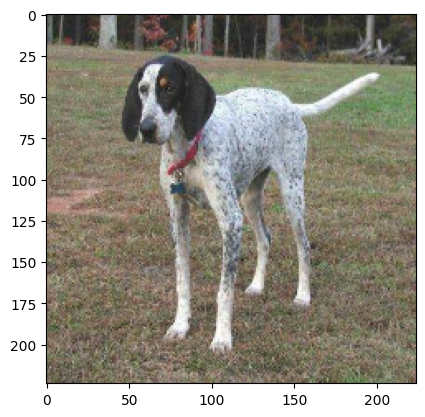

In [44]:
# prediction
testimage = cv2.imread("train/00214f311d5d2247d5dfe4fe24b2303d.jpg")
testimage = cv2.resize(testimage, (224, 224))
testimage = cv2.cvtColor(testimage, cv2.COLOR_BGR2RGB)
testimage = np.expand_dims(testimage, axis=0)
plt.imshow(testimage[0])

In [46]:
result = final_model.predict(testimage)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [47]:
np.max(result)

np.float32(0.80778825)

In [48]:
np.argmax(result) # bluetick

np.int64(15)

In [49]:
label.loc[label["id"] == "00214f311d5d2247d5dfe4fe24b2303d.jpg"]

,id,breed
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick


In [50]:
train_idg.class_indices

{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'